In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-06-12 19:05:55.649581: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-12 19:05:55.704845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 19:05:55.944684: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 19:05:55.946618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 19:05:57.683485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
# uci DryBean
# indep. var. (X): 13 ~16:ShapeFactor
# dep. var. (y): 17:Class

#DNN Classifier

In [4]:
file = 'Dry_Bean_Dataset.CSV'
df = pd.read_csv(file, encoding = 'cp949')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.shape

(13611, 17)

In [11]:
X = df.iloc[:, 12:16]
y = df.iloc[:, -1].astype('category').cat.codes
print(X)
print(y.value_counts())

       ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4
0          0.007332      0.003147      0.834222      0.998724
1          0.006979      0.003564      0.909851      0.998430
2          0.007244      0.003048      0.825871      0.999066
3          0.007017      0.003215      0.861794      0.994199
4          0.006697      0.003665      0.941900      0.999166
...             ...           ...           ...           ...
13606      0.006858      0.001749      0.642988      0.998385
13607      0.006688      0.001886      0.676099      0.998219
13608      0.006681      0.001888      0.676884      0.996767
13609      0.006724      0.001852      0.668237      0.995222
13610      0.007001      0.001640      0.616221      0.998180

[13611 rows x 4 columns]
3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [15]:
print(X_train.shape)

(10208, 4)


In [19]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (4,)),
    keras.layers.Dense(12, activation = 'relu'), # keras.layers.Dense
    keras.layers.Dense(7)
])

# keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy']
             )

h = model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
319/319 [==============================] - 1s 2ms/step - loss: 1.5953 - accuracy: 0.4031
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 1.1992 - accuracy: 0.5531
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0935 - accuracy: 0.5852
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0594 - accuracy: 0.5943
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0405 - accuracy: 0.6030
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0321 - accuracy: 0.6019
Epoch 7/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0224 - accuracy: 0.6050
Epoch 8/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0115 - accuracy: 0.6091
Epoch 9/50
319/319 [==============================] - 1s 2ms/step - loss: 1.0006 - accuracy: 0.6114
Epoch 10/50
319/319 [==============================] - 1s 3ms/step - loss: 0.9766 - accuracy: 0.6179

In [18]:
model.summary()

# 똑같은 정확도를 낸다라고 가정을 하면, params(파라미터) 갯수가 조금 더 적은 것이 좋은 모델이다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                60        
                                                                 
 dense_3 (Dense)             (None, 7)                 91        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


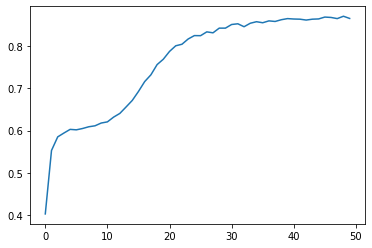

In [23]:
#h.history['accuracy']
_, axe = plt.subplots()
axe.plot(h.history['accuracy'])

In [25]:
model.evaluate(X_test, y_test) # 맨마지막의 모델의 정확도를 보여준다.

107/107 [==============================] - 1s 2ms/step - loss: 0.3891 - accuracy: 0.8786


[0.3890549838542938, 0.8786364793777466]